# Indian Food
 
## Content
Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices and traditions.

This dataset consists of information about various Indian dishes, their ingredients, their place of origin, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import the dataset
indianfood = pd.read_csv("indian_food.csv")

## Column Description
* **name** : name of the dish

* **ingredients** : main ingredients used

* **diet** : type of diet - either vegetarian or non vegetarian

* **prep_time** : preparation time

* **cook_time** : cooking time

* **flavor_profile** : flavor profile includes whether the dish is spicy, sweet, bitter, etc

* **course** : course of meal - starter, main course, dessert, etc

* **state** : state where the dish is famous or is originated

* **region** : region where the state belongs

Presence of -1 in any of the columns indicates NaN value.

In [3]:
indianfood.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
indianfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:
indianfood.shape

(255, 9)

In [6]:
indianfood.region.value_counts()

West          74
South         59
North         49
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

In [7]:
# Missing values count in the dataset
indianfood.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [8]:
indianfood = indianfood.dropna()
indianfood.shape

(254, 9)

In [9]:
diettypes = indianfood.diet.value_counts().reset_index()
diettypes

,index,diet
0,vegetarian,225
1,non vegetarian,29


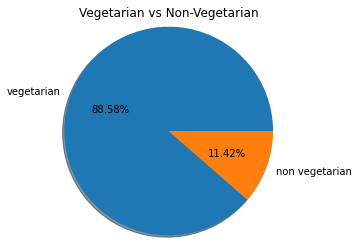

In [10]:
# plt.pie(indianfood.diet , labels=diettypes["index"] , autopct='%.2f%%' , radius=1.5)

plt.pie(diettypes.diet, labels = diettypes['index'],autopct='%0.2f%%',shadow=True , radius = 1.2 )
plt.title("Vegetarian vs Non-Vegetarian")
plt.show()

In [11]:
indianfood.course.value_counts()

main course    129
dessert         84
snack           39
starter          2
Name: course, dtype: int64

In [12]:
indianfood.region.value_counts()

West          74
South         59
North         49
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

In [13]:
piv_tab = indianfood.pivot_table(values='name' , index = ['region'] , columns = "course" , aggfunc = 'count')
piv_tab

course,dessert,main course,snack,starter
region,,,,
-1,5.0,4.0,4.0,NaN
Central,1.0,1.0,1.0,NaN
East,21.0,10.0,NaN,NaN
North,9.0,37.0,1.0,2.0
North East,7.0,18.0,NaN,NaN
South,18.0,31.0,10.0,NaN
West,23.0,28.0,23.0,NaN


Text(0.5, 1.0, 'Region vs course')

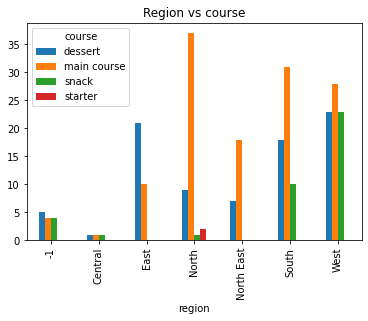

In [14]:
piv_tab.plot(kind ="bar")
plt.title('Region vs course')

In [15]:
indianfood.flavor_profile.value_counts()

spicy     133
sweet      87
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [16]:
region_course = indianfood.pivot_table(values = 'name' , 
                       index = ['region'],
                       columns = 'flavor_profile',
                       aggfunc = 'count')

Text(0.5, 1.0, 'Region vs Flavor profile')

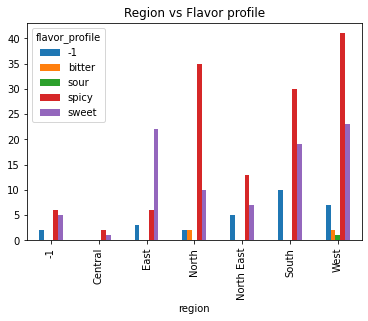

In [17]:
region_course.plot(kind = 'bar')
plt.title("Region vs Flavor profile")

Text(0.5, 1.0, 'Number of courses count')

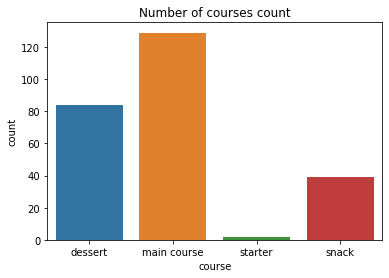

In [18]:
sns.countplot(x=indianfood['course'])
plt.title("Number of courses count")

Text(0.5, 1.0, 'Regional variety count')

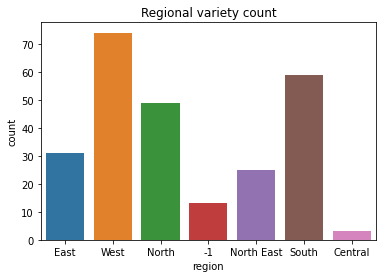

In [19]:
sns.countplot(x = indianfood.region)
plt.title('Regional variety count')

Text(0.5, 1.0, 'Flavor profile')

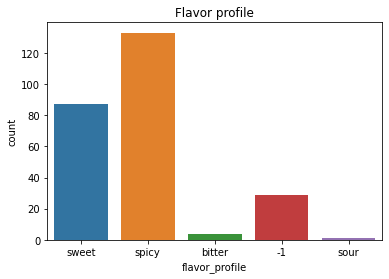

In [20]:
sns.countplot(x=indianfood['flavor_profile'])
plt.title("Flavor profile")

Text(0.5, 1.0, 'state')

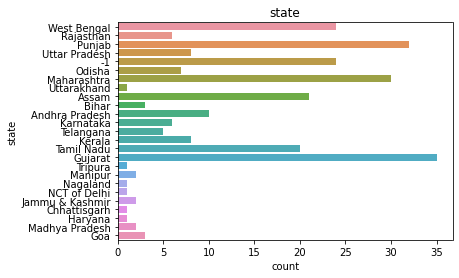

In [34]:
sns.countplot(y=indianfood['state'] ,)
plt.title("state")

Text(0.5, 1.0, 'Prep_time and cook_time')

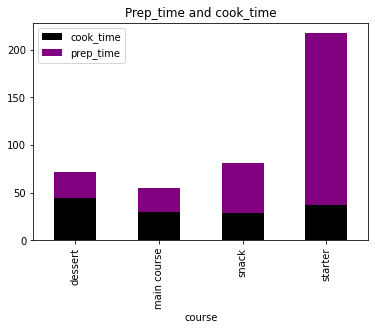

In [35]:
Time=indianfood.pivot_table(values=['prep_time','cook_time'],index='course',aggfunc=np.mean)
Time.plot(kind='bar',stacked=True,color=['black','purple'])
plt.title("Prep_time and cook_time")

In [45]:
indianfood['total_time'] = indianfood.prep_time + indianfood.cook_time
indianfood.sort_values('total_time',ascending = True).tail()[['name','course','total_time']]

,name,course,total_time
128,Dosa,snack,450
29,Misti doi,dessert,510
155,Puttu,main course,535
114,Pindi chana,main course,620
62,Shrikhand,dessert,730


In [55]:
statelist = indianfood[indianfood['state']=='West Bengal'].reset_index(drop=True)
statelist

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55
2,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East,60
3,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East,50
4,Cham cham,"Flour, cream, sugar, saffron, lemon juice, coc...",vegetarian,40,60,sweet,dessert,West Bengal,East,100
5,Ledikeni,"Chhena, sugar, ghee",vegetarian,45,45,sweet,dessert,West Bengal,East,90
6,Mihidana,"Besan flour, sugar, ghee",vegetarian,15,30,sweet,dessert,West Bengal,East,45
7,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East,510
8,Pantua,"Chhena, sugar, ghee, flour",vegetarian,45,45,sweet,dessert,West Bengal,East,90
9,Ras malai,"Chhena, reduced milk, pistachio",vegetarian,180,60,sweet,dessert,West Bengal,East,240
